# Curso: Redes Neurais e Deep Learning

Prof. Denilson Alves Pereira 
https://sites.google.com/ufla.br/denilsonpereira/ 
Departamento de Ciência da Computação - 
Instituto de Ciências Exatas e Tecnológicas - 
Universidade Federal de Lavras

# Atividade Prática 03

**Tempo estimado para execução**: 3 horas

Versão: Junho, 2021

## Projeto Final

O objetivo da atividade é desenvolver um projeto prático livre utilizando o conhecimento adquirido no curso. Você deve escolher um *dataset* para um problema de classificação, ler e efetuar o pré-processamento desse conjunto de dados e configurar uma rede neural para efetuar a classificação. Execute as seguintes etapas: definição, compilação e treinamento do modelo, avaliação e predição no conjunto de teste. Você deve avaliar diversas configurações para a sua rede neural, de forma a obter um resultado satisfatório. Verifique na literatura os melhores resultados obtidos com o *dataset*, se você estiver usando um *dataset* público.

Para o *dataset*, escolha uma das opções abaixo:
- um dataset que você esteja trabalhando em um projeto pessoal ou da sua empresa;
- um dataset público.

Existem diversos *datasets* públicos disponíveis na Web. A plataforma *Kaggle* (https://www.kaggle.com/) é uma das principais fontes. A *Kaggle* é formada por uma comunidade *online* de cientistas de dados e programadores em *machine learning*. Os usuários podem encontrar *datasets* e códigos em Python que os utilizam. Também podem participar de competições, fazendo parte de equipes, para resolver desafios da ciência de dados, inclusive com possibilidades de premiações em dinheiro.

Este link (https://analyticsindiamag.com/10-most-popular-datasets-on-kaggle/) apresenta os 10 *datasets* mais populares na plataforma *Kaggle*.

Este link (https://enoumen.com/2021/04/23/data-sciences-datasets-data-visualization-data-analytics-big-data-data-lakes/) apresenta 300 *datasets* públicos que pode ser úteis para execução da atividade prática. 

#### Importante:
Documente cada etapa do seu código. Crie céluas de *Markdown* com textos explicativos e links para referências. Adicione comentários ao seu código.

In [1]:
### INICIE O CÓDIGO AQUI ### (várias linhas de código / várias células)

# Previsão de sobreviventes no naufrágio do navio Titanic

<h3>Por José Geraldo Dantas Nunes</h3>

<h3>Baseado em: </h3>

https://www.kaggle.com/c/titanic

In [2]:
# Bibliotecas necessárias para o desenvolvimento da Rede Neural

import numpy as np
import pandas as pd    
import keras
import matplotlib.pyplot as plt

from keras import layers
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

<h3>Importa os dados de treino e teste do dataset</h3>

In [3]:
dataset_treino = pd.read_csv('dataset/train.csv')
dataset_teste = pd.read_csv('dataset/test.csv')
dataset_resultados = pd.read_csv('dataset/gender_submission.csv')

In [4]:
# Amostra de dados utilizados para treinamento da Rede Neural
dataset_treino.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Transformação dos valores STRING da coluna SEXO em NÚMEROS no conjunto de treinamento

In [5]:
codifica_sexo = LabelEncoder()

dataset_treino = dataset_treino[['PassengerId','Sex','SibSp','Parch','Pclass','Survived']]
dataset_treino.iloc[:,1]  = codifica_sexo.fit_transform(dataset_treino.iloc[:,1])
dataset_treino.head()

PassengerId  Sex  SibSp  Parch  Pclass  Survived
0            1    1      1      0       3         0
1            2    0      1      0       1         1
2            3    0      0      0       3         1
3            4    0      1      0       1         1
4            5    1      0      0       3         0

Transformação dos valores STRING da coluna SEXO em NÚMEROS no conjunto de teste

In [6]:
dataset_teste = dataset_teste[['PassengerId','Sex','SibSp','Parch','Pclass']]
dataset_teste.iloc[:,1] = codifica_sexo.fit_transform(dataset_teste.iloc[:,1])
dataset_teste.head()

PassengerId  Sex  SibSp  Parch  Pclass
0          892    1      0      0       3
1          893    0      1      0       3
2          894    1      0      0       2
3          895    1      0      0       3
4          896    0      1      1       3

In [7]:
X_treino = dataset_treino.iloc[:,0:5]   
y_treino = dataset_treino.iloc[:,5]     

Normalização dos dados 

In [8]:
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.fit_transform(dataset_teste)

In [9]:
# Amostra de dados para treinamento da Rede Neural
print(X_treino)

[[-1.73010796  0.73769513  0.43279337 -0.47367361  0.82737724]
 [-1.72622007 -1.35557354  0.43279337 -0.47367361 -1.56610693]
 [-1.72233219 -1.35557354 -0.4745452  -0.47367361  0.82737724]
 ...
 [ 1.72233219 -1.35557354  0.43279337  2.00893337  0.82737724]
 [ 1.72622007  0.73769513 -0.4745452  -0.47367361 -1.56610693]
 [ 1.73010796  0.73769513 -0.4745452  -0.47367361  0.82737724]]


In [10]:
# Amostra de dados para teste da Rede Neural
print(X_teste)

[[-1.72791209  0.75592895 -0.49947002 -0.4002477   0.87348191]
 [-1.71962474 -1.32287566  0.61699237 -0.4002477   0.87348191]
 [-1.71133739  0.75592895 -0.49947002 -0.4002477  -0.31581919]
 ...
 [ 1.71133739  0.75592895 -0.49947002 -0.4002477   0.87348191]
 [ 1.71962474  0.75592895 -0.49947002 -0.4002477   0.87348191]
 [ 1.72791209  0.75592895  0.61699237  0.61989583  0.87348191]]


<h3>Contrução da Rede Neural</h3>

Configuração de criação da Rede Neural <br>
Rede criada com 04 Camadas Densas, sendo:  <br>
<ul>
  <li>01 camada com 20 neurônios e função de ativação RELU </li>
  <li>01 camada com 50 neurônios e função de ativação RELU   </li>
  <li>01 camada com 30 Neurônio e função de ativação RELU </li>
  <li>01 camada com 01 Neurônio e função de ativação SIGMOID </li>
</ul>        
Obs.: Os parâmetros foram selecionados de acordo com uma sequência de testes até alcançar um resultado satisfatório    


In [11]:
rede_neural = Sequential()
saida = rede_neural.add(layers.Dense(20 , activation = 'relu' , input_shape = (5,))) 
saida = rede_neural.add(layers.Dense(50 , activation = 'relu' , input_shape = (5,))) 
saida = rede_neural.add(layers.Dense(30 , activation = 'relu', input_shape = (saida,)))
rede_neural.add(layers.Dense(1 , activation = 'sigmoid', input_shape = (saida,)))

<h3>Compilação da Rede Neural</h3>

In [12]:
rede_neural.compile(optimizer = 'adam', # Métrica de otimização do modelo
                   loss = 'binary_crossentropy', # Função de cálculo de perda do modelo
                   metrics = ['accuracy']) # Métrica de monitoramento da execução correta do modelo

<h3>Estrutura e Configuração da Rede Neural</h3>

In [13]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 50)                1050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,731
Trainable params: 2,731
Non-trainable params: 0
_________________________________________________________________


<h3>Treinamento e apresentação do histórico de execução da Rede Neural</h3>

In [14]:
historico = rede_neural.fit(X_treino,
                    y_treino,
                    epochs = 100,
                    batch_size = 10,
                    validation_data=(X_treino, y_treino))

Epoch 1/100
90/90 [==============================] - 1s 3ms/step - loss: 0.5250 - accuracy: 0.7755 - val_loss: 0.4552 - val_accuracy: 0.8070
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.8025 - val_loss: 0.4405 - val_accuracy: 0.7980
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7935 - val_loss: 0.4322 - val_accuracy: 0.8058
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.7912 - val_loss: 0.4261 - val_accuracy: 0.8070
Epoch 5/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8025 - val_loss: 0.4260 - val_accuracy: 0.8081
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8058 - val_loss: 0.4229 - val_accuracy: 0.8036
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8013 - val_loss: 0.4203 - val_accuracy: 0.8092
Epoch 8/100
9

Epoch 59/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8373 - val_loss: 0.3782 - val_accuracy: 0.8451
Epoch 60/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8373 - val_loss: 0.3795 - val_accuracy: 0.8339
Epoch 61/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8305 - val_loss: 0.3759 - val_accuracy: 0.8474
Epoch 62/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8249 - val_loss: 0.3773 - val_accuracy: 0.8384
Epoch 63/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8316 - val_loss: 0.3744 - val_accuracy: 0.8418
Epoch 64/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8305 - val_loss: 0.3731 - val_accuracy: 0.8451
Epoch 65/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8350 - val_loss: 0.3733 - val_accuracy: 0.8440
Epoch 

<h2>Avaliação da Rede Neural</h2>

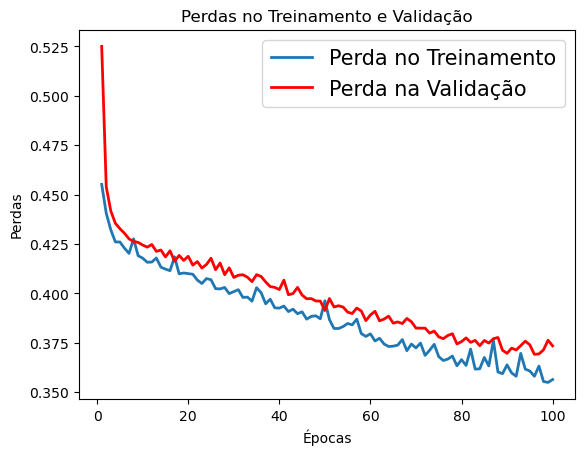

In [15]:
perda = historico.history['loss']
valor_perda = historico.history['val_loss']
epoca = range(1 , len(perda) + 1)

plt.style.use('default')
plt.title('Perdas no Treinamento e Validação')
plt.xlabel('Épocas') 
plt.ylabel('Perdas')

valor_perda = plt.plot(epoca, valor_perda, label='Perda no Treinamento')
perda_treino = plt.plot(epoca, perda, label='Perda na Validação', color="r")

plt.setp(valor_perda, linewidth=2.0)
plt.setp(perda_treino, linewidth=2.0)

plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.legend()
plt.show()

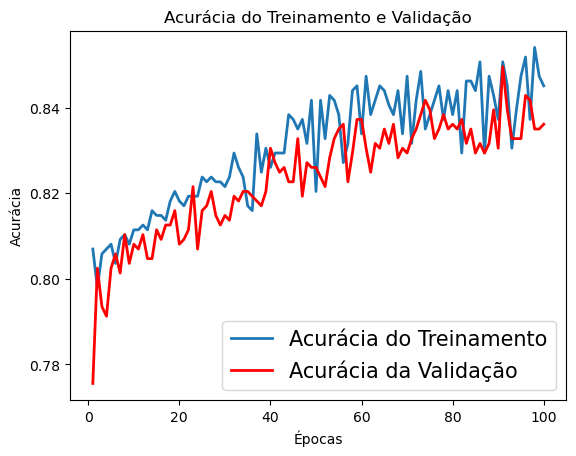

In [16]:
acuracia = historico.history['accuracy']
val_acuracia = historico.history['val_accuracy']
epoca = range(1, len(acuracia) + 1)

plt.style.use('default')
plt.title('Acurácia do Treinamento e Validação')
plt.xlabel('Épocas') 
plt.ylabel('Acurácia')

valor_acuracia = plt.plot(epoca, val_acuracia, label='Acurácia do Treinamento')
acuracia_treino = plt.plot(epoca, acuracia, label='Acurácia da Validação', color="r")

plt.setp(valor_acuracia, linewidth=2.0)
plt.setp(acuracia_treino, linewidth=2.0)

plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.legend()
plt.show()

<h3> Previsão de chances de sobrevivência de cada passageiro (ID) considerando: </h3>

    
    
<ul>
  <li>Idade</li>
  <li>Sexo (Feminimo/Masculino)</li>
  <li>Classe da passagem</li>
</ul>            

In [17]:
predicao = rede_neural.predict(X_teste).tolist()
previsao = pd.Series(predicao)
se = pd.Series(previsao)
dataset_resultados['check'] = se
dataset_resultados['check'] = dataset_resultados['check'].str.get(0)
dataset_resultados.head(len(dataset_resultados))

for passageiro, sobrevivente, chance in zip(dataset_resultados['PassengerId'], list(dataset_resultados['Survived']), dataset_resultados['check']):
    if(sobrevivente): vivo = 'SIM'
    else: vivo = 'NÃO'
        
    print('ID_Passageiro: ',passageiro, '  Chance: {:.2%}'.format(chance), '  Sobrevive?: ', vivo)
        

ID_Passageiro:  892   Chance: 11.51%   Sobrevive?:  NÃO
ID_Passageiro:  893   Chance: 17.97%   Sobrevive?:  SIM
ID_Passageiro:  894   Chance: 19.69%   Sobrevive?:  NÃO
ID_Passageiro:  895   Chance: 11.64%   Sobrevive?:  NÃO
ID_Passageiro:  896   Chance: 81.35%   Sobrevive?:  SIM
ID_Passageiro:  897   Chance: 11.72%   Sobrevive?:  NÃO
ID_Passageiro:  898   Chance: 82.92%   Sobrevive?:  SIM
ID_Passageiro:  899   Chance: 19.81%   Sobrevive?:  NÃO
ID_Passageiro:  900   Chance: 82.81%   Sobrevive?:  SIM
ID_Passageiro:  901   Chance: 4.50%   Sobrevive?:  NÃO
ID_Passageiro:  902   Chance: 11.95%   Sobrevive?:  NÃO
ID_Passageiro:  903   Chance: 29.67%   Sobrevive?:  NÃO
ID_Passageiro:  904   Chance: 97.08%   Sobrevive?:  SIM
ID_Passageiro:  905   Chance: 2.62%   Sobrevive?:  NÃO
ID_Passageiro:  906   Chance: 97.21%   Sobrevive?:  SIM
ID_Passageiro:  907   Chance: 46.12%   Sobrevive?:  SIM
ID_Passageiro:  908   Chance: 18.28%   Sobrevive?:  NÃO
ID_Passageiro:  909   Chance: 12.26%   Sobrevive?:

In [18]:
### TERMINE O CÓDIGO AQUI ###